<a href="https://colab.research.google.com/github/thecat065/data-science-challenge-alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación




--- 1. Ingreso Total por Tienda ---
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


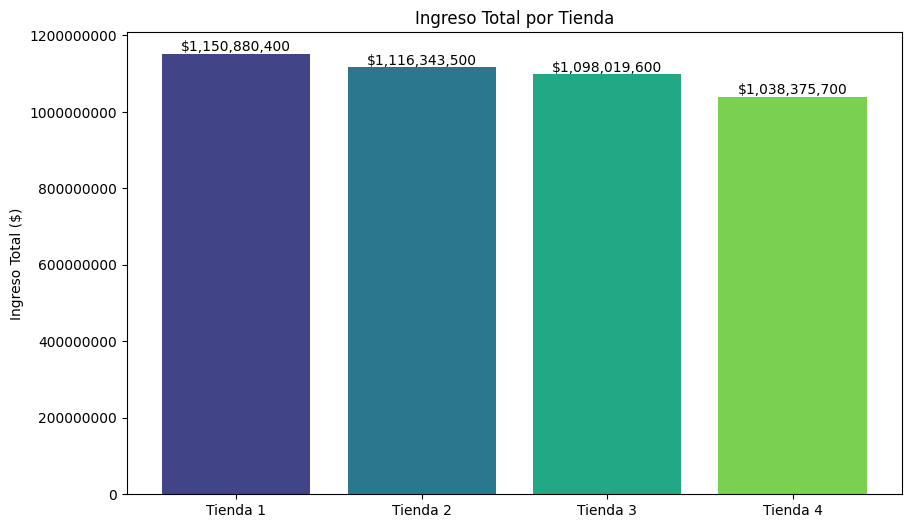

In [5]:

COLUMNA_PRECIO = 'Precio'
COLUMNA_CATEGORIA = 'Categoría del Producto'
COLUMNA_EVALUACION = 'Evaluación'
COLUMNA_PRODUCTO = 'Producto'
COLUMNA_ENVIO = 'Envío'

# Crear lista de DataFrames y diccionario de resultados
tiendas_dfs = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}
resultados = {} # Reinicia o crea el diccionario de resultados

# --- 1. Ingreso Total por Tienda (Usando COLUMNA_PRECIO) ---
print("\n--- 1. Ingreso Total por Tienda ---")
facturacion_total = {}
for nombre, df in tiendas_dfs.items():
    try:

        if pd.api.types.is_numeric_dtype(df[COLUMNA_PRECIO]):
            total = df[COLUMNA_PRECIO].sum()
            facturacion_total[nombre] = total
            print(f"{nombre}: ${total:,.2f}")
        else:
             print(f"WARN: La columna '{COLUMNA_PRECIO}' en {nombre} no es numérica. No se puede sumar.")
             facturacion_total[nombre] = 0 # O None
    except KeyError:
        print(f"ERROR: No se encontró la columna '{COLUMNA_PRECIO}' en {nombre}. Revisa el nombre en la variable COLUMNA_PRECIO.")
        facturacion_total[nombre] = 0 # O None
    except Exception as e:
        print(f"Error inesperado calculando facturación para {nombre}: {e}")
        facturacion_total[nombre] = 0 # O None


# Visualización 1: Gráfico de Barras - Ingreso Total
# Solo graficar si hay datos válidos
fact_plot_data = {k: v for k, v in facturacion_total.items() if v is not None and v > 0}
if fact_plot_data:
    plt.figure(figsize=(10, 6))
    stores = list(fact_plot_data.keys())
    revenues = list(fact_plot_data.values())
    # Asegurarse que las librerías de gráficos están importadas
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        bars = plt.bar(stores, revenues, color=sns.color_palette("viridis", len(stores)))
        plt.ylabel('Ingreso Total ($)')
        plt.title('Ingreso Total por Tienda')
        plt.ticklabel_format(style='plain', axis='y')
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.0f}', va='bottom', ha='center')
        plt.show()
    except NameError:
        print("Error: Asegúrate de haber importado matplotlib.pyplot como plt y seaborn como sns al principio del notebook.")
    except Exception as e:
        print(f"Error al generar el gráfico de facturación: {e}")

else:
    print("No hay datos de facturación válidos para graficar.")

resultados['facturacion'] = facturacion_total

# 2. Ventas por categoría


--- 2. Ventas por Categoría (Cantidad de Productos) ---
Tienda 1: Categoría más popular -> Muebles (465 ventas)
Tienda 2: Categoría más popular -> Muebles (442 ventas)
Tienda 3: Categoría más popular -> Muebles (499 ventas)
Tienda 4: Categoría más popular -> Muebles (480 ventas)


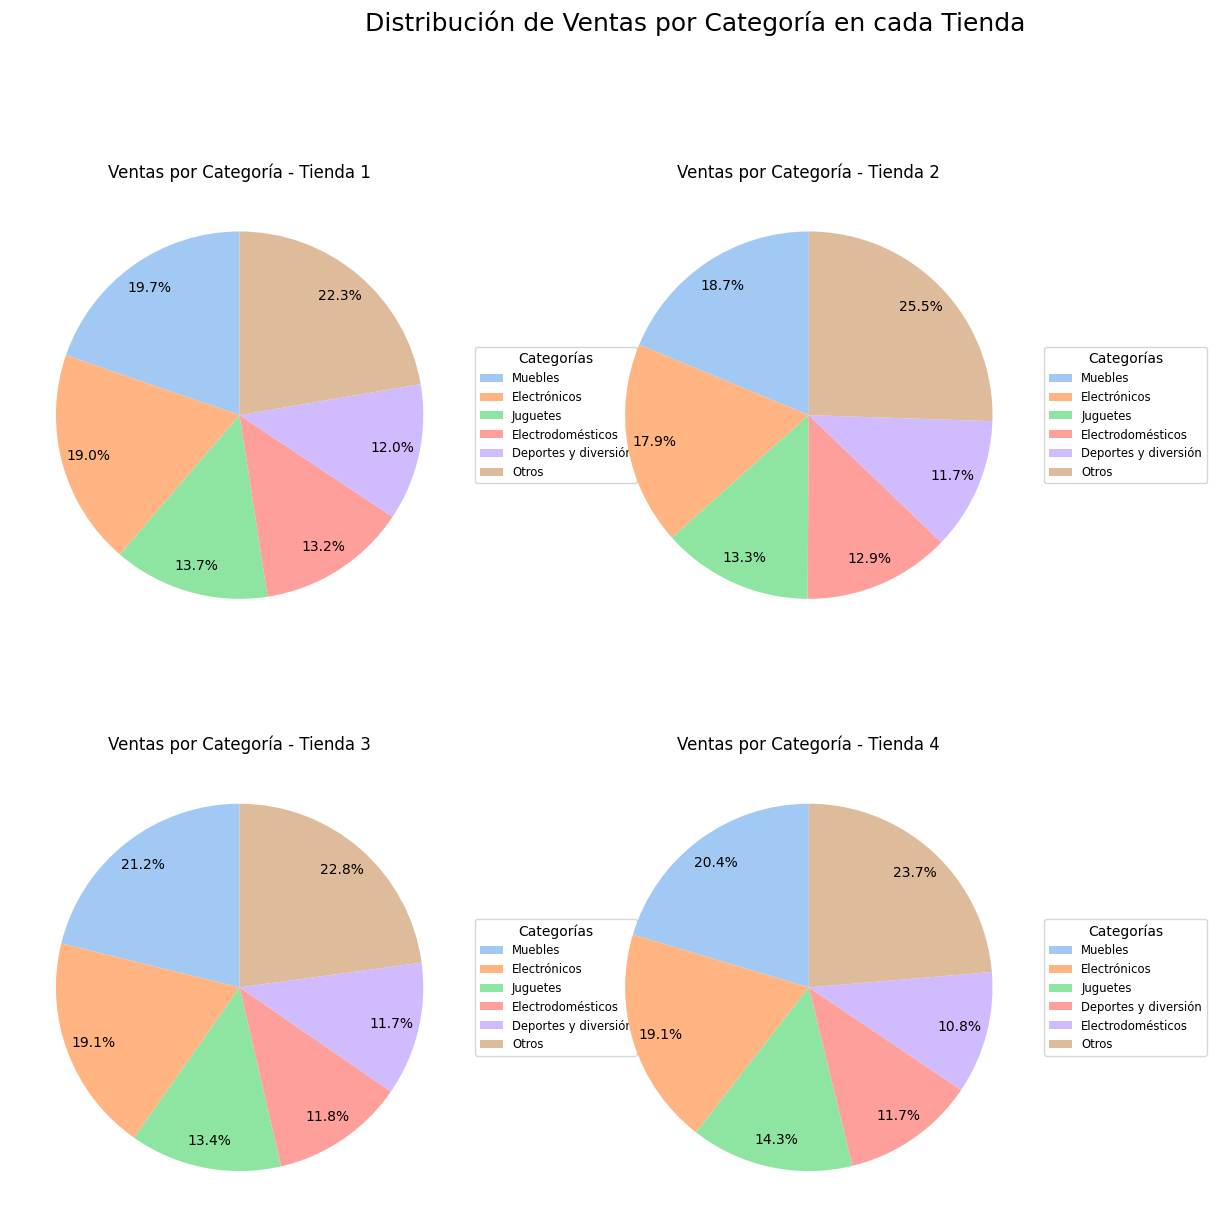

In [7]:

# --- 2. Ventas por Categoría (Contando ocurrencias de COLUMNA_CATEGORIA) ---
print("\n--- 2. Ventas por Categoría (Cantidad de Productos) ---")

COLUMNA_CATEGORIA = 'Categoría del Producto'

categorias_populares = {}
distribucion_categorias = {}
for nombre, df in tiendas_dfs.items():
    try:

        if COLUMNA_CATEGORIA in df.columns:
            cat_counts = df[COLUMNA_CATEGORIA].value_counts()
            distribucion_categorias[nombre] = cat_counts
            if not cat_counts.empty:
                top_categoria = cat_counts.idxmax() # La categoría con más ventas (conteo)
                categorias_populares[nombre] = top_categoria
                print(f"{nombre}: Categoría más popular -> {top_categoria} ({cat_counts.max()} ventas)")
            else:
                print(f"{nombre}: La columna '{COLUMNA_CATEGORIA}' está vacía.")
                categorias_populares[nombre] = "N/A"
        else:
             print(f"ERROR: No se encontró la columna '{COLUMNA_CATEGORIA}' en {nombre}. Verifica el nombre.")
             distribucion_categorias[nombre] = None # Marcar que no hay datos
             categorias_populares[nombre] = "Error"

    except Exception as e:
        print(f"Error inesperado analizando categorías para {nombre}: {e}")
        distribucion_categorias[nombre] = None
        categorias_populares[nombre] = "Error"


# Visualización 2: Gráficos Circulares - Distribución de Categorías (Top 5 + Otros)
cat_plot_data = {k: v for k, v in distribucion_categorias.items() if v is not None and not v.empty}
if cat_plot_data:
    num_plots = len(cat_plot_data)
    # Ajustar el layout si hay menos de 4 tiendas con datos
    ncols = 2
    nrows = (num_plots + ncols - 1) // ncols # Calcula filas necesarias
    fig, axes = plt.subplots(nrows, ncols, figsize=(7*ncols, 6*nrows), squeeze=False) # squeeze=False para que siempre sea 2D
    axes = axes.flatten() # Convertir a 1D para fácil iteración
    colors = sns.color_palette("pastel")

    plot_idx = 0 # Índice para los ejes
    for nombre, counts in cat_plot_data.items():
        ax = axes[plot_idx] # Eje actual

        # Agrupar categorías menores en 'Otros' si hay muchas
        display_limit = 5 # Mostrar las top 5 explícitamente
        if len(counts) > display_limit:
            counts_display = counts.nlargest(display_limit).copy()
            others_sum = counts.nsmallest(len(counts) - display_limit).sum()
            if others_sum > 0:
                 # Usar .loc para añadir 'Otros' de forma segura
                 counts_display.loc['Otros'] = others_sum
        else:
            counts_display = counts.copy() # Trabajar con copia

        # Crear el gráfico de pastel
        wedges, texts, autotexts = ax.pie(counts_display, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)
        ax.set_title(f'Ventas por Categoría - {nombre}')

        # Añadir leyenda fuera del gráfico para evitar solapamientos
        # Ajustar bbox_to_anchor según sea necesario si la leyenda se corta
        ax.legend(wedges, counts_display.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small')
        plot_idx += 1 # Incrementar índice para el próximo gráfico

    # Ocultar ejes vacíos si el número de tiendas no es múltiplo de ncols
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle('Distribución de Ventas por Categoría en cada Tienda', fontsize=18, y=1.05) # Ajustar 'y' si el título solapa
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para leyenda
    plt.show()

else:
  print("\nNo hay datos válidos de categorías para graficar.")

resultados['top_categoria'] = categorias_populares

# 3. Calificación promedio de la tienda



--- 3. Calificación Promedio por Tienda ---
Tienda 1: Calificación promedio -> 3.98 / 5
Tienda 2: Calificación promedio -> 4.04 / 5
Tienda 3: Calificación promedio -> 4.05 / 5
Tienda 4: Calificación promedio -> 4.00 / 5


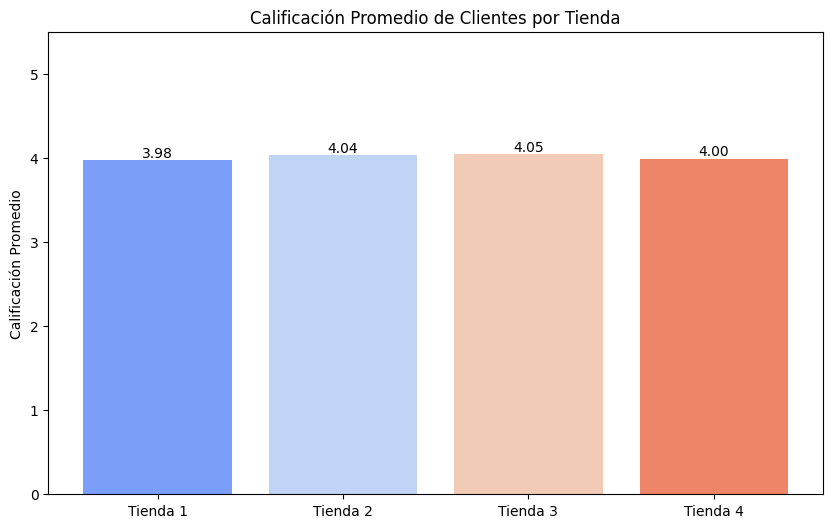

In [9]:

# --- 3. Valoración Media por Tienda (Usando COLUMNA_EVALUACION) ---
print("\n--- 3. Calificación Promedio por Tienda ---")

COLUMNA_EVALUACION = 'Calificación' # <-- ¡Asegúrate que este es el nombre correcto!

evaluacion_promedio = {}
for nombre, df in tiendas_dfs.items():
    try:

        if COLUMNA_EVALUACION in df.columns and pd.api.types.is_numeric_dtype(df[COLUMNA_EVALUACION]):
            promedio = df[COLUMNA_EVALUACION].mean()
            evaluacion_promedio[nombre] = promedio
            # mostramos sobre 5
            print(f"{nombre}: Calificación promedio -> {promedio:.2f} / 5")
        elif COLUMNA_EVALUACION not in df.columns:
             print(f"ERROR: No se encontró la columna '{COLUMNA_EVALUACION}' en {nombre}. Verifica el nombre.")
             evaluacion_promedio[nombre] = None
        else:
            print(f"WARN: La columna '{COLUMNA_EVALUACION}' en {nombre} no es numérica. No se puede calcular el promedio.")
            evaluacion_promedio[nombre] = None

    except Exception as e:
        print(f"Error inesperado calculando calificación para {nombre}: {e}")
        evaluacion_promedio[nombre] = None


# Visualización 3: Gráfico de Barras - Calificación Promedio
eval_plot_data = {k: v for k, v in evaluacion_promedio.items() if v is not None}
if eval_plot_data:
    plt.figure(figsize=(10, 6))
    stores_rating = list(eval_plot_data.keys())
    avg_ratings = list(eval_plot_data.values())
    bars = plt.bar(stores_rating, avg_ratings, color=sns.color_palette("coolwarm", len(stores_rating)))
    plt.ylabel('Calificación Promedio')
    plt.title('Calificación Promedio de Clientes por Tienda')

    # Ajustar límites del eje Y - escala 1-5
    min_rating = min(avg_ratings) if avg_ratings else 0
    max_rating = max(avg_ratings) if avg_ratings else 5
    plt.ylim(0, 5.5) # Dejar un poco de espacio arriba del 5

    # Añadir etiquetas de valor sobre las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center') # va='bottom' para ponerla justo encima

    plt.show()
else:
    print("\nNo hay datos válidos de calificación para graficar.")

resultados['avg_evaluacion'] = evaluacion_promedio

# 4. Productos más y menos vendidos


--- 4. Productos Más y Menos Vendidos por Tienda ---
Tienda 1:
  -> Más vendido: Microondas (60 unidades)
  -> Menos vendido: Auriculares con micrófono (33 unidades)
Tienda 2:
  -> Más vendido: Iniciando en programación (65 unidades)
  -> Menos vendido: Juego de mesa (32 unidades)
Tienda 3:
  -> Más vendido: Kit de bancas (57 unidades)
  -> Menos vendido: Bloques de construcción (35 unidades)
Tienda 4:
  -> Más vendido: Cama box (62 unidades)
  -> Menos vendido: Guitarra eléctrica (33 unidades)

--- Resumen Productos Más/Menos Vendidos ---


,Producto Más Vendido,Producto Menos Vendido
Tienda 1,Microondas,Auriculares con micrófono
Tienda 2,Iniciando en programación,Juego de mesa
Tienda 3,Kit de bancas,Bloques de construcción
Tienda 4,Cama box,Guitarra eléctrica


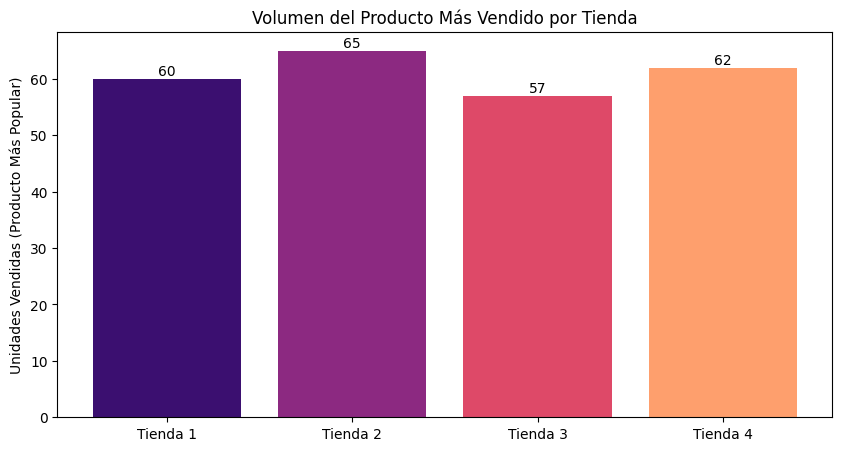

In [10]:

# --- 4. Productos Más y Menos Vendidos
print("\n--- 4. Productos Más y Menos Vendidos por Tienda ---")

COLUMNA_PRODUCTO = 'Producto' # <-- ¡Asegúrate que este es el nombre correcto!

productos_extremos = {}
counts_mas_vendido = {} # Para el gráfico opcional

for nombre, df in tiendas_dfs.items():
    try:
        if COLUMNA_PRODUCTO in df.columns:
            conteo_productos = df[COLUMNA_PRODUCTO].value_counts()
            if not conteo_productos.empty:
                mas_vendido = conteo_productos.idxmax()
                menos_vendido = conteo_productos.idxmin()
                count_max = conteo_productos.max()
                count_min = conteo_productos.min()
                productos_extremos[nombre] = {'mas_vendido': mas_vendido, 'menos_vendido': menos_vendido}
                counts_mas_vendido[nombre] = count_max # Guardar conteo del más vendido
                print(f"{nombre}:")
                print(f"  -> Más vendido: {mas_vendido} ({count_max} unidades)")
                # Solo mostrar el menos vendido si hay más de un producto único
                if len(conteo_productos) > 1:
                     print(f"  -> Menos vendido: {menos_vendido} ({count_min} unidades)")
                else:
                     print(f"  -> Solo hay un tipo de producto: {mas_vendido} ({count_max} unidades)")

            else:
                print(f"{nombre}: La columna '{COLUMNA_PRODUCTO}' está vacía.")
                productos_extremos[nombre] = {'mas_vendido': 'N/A', 'menos_vendido': 'N/A'}
                counts_mas_vendido[nombre] = 0
        else:
             print(f"ERROR: No se encontró la columna '{COLUMNA_PRODUCTO}' en {nombre}. Verifica el nombre.")
             productos_extremos[nombre] = {'mas_vendido': 'Error', 'menos_vendido': 'Error'}
             counts_mas_vendido[nombre] = 0

    except Exception as e:
        print(f"Error inesperado analizando productos para {nombre}: {e}")
        productos_extremos[nombre] = {'mas_vendido': 'Error', 'menos_vendido': 'Error'}
        counts_mas_vendido[nombre] = 0


# Visualización 4: Tabla Resumen y Gráfico del Más Vendido
print("\n--- Resumen Productos Más/Menos Vendidos ---")
try:
    # Crear DataFrame desde el diccionario y mostrarlo
    df_productos = pd.DataFrame.from_dict(productos_extremos, orient='index')
    # Renombrar columnas para claridad
    df_productos.columns = ['Producto Más Vendido', 'Producto Menos Vendido']
    # Imprimir el DataFrame
    from IPython.display import display # Para mejor visualización en Colab
    display(df_productos)
except Exception as e:
    print(f"No se pudo crear o mostrar el DataFrame resumen de productos: {e}")

# Graficar la cantidad del producto más vendido por tienda
if counts_mas_vendido:
    # Filtrar tiendas con conteo > 0
    plot_data_prod = {k: v for k, v in counts_mas_vendido.items() if v > 0}
    if plot_data_prod:
        plt.figure(figsize=(10, 5))
        stores_prod = list(plot_data_prod.keys())
        counts_prod = list(plot_data_prod.values())
        bars = plt.bar(stores_prod, counts_prod, color=sns.color_palette("magma", len(stores_prod)))
        plt.ylabel('Unidades Vendidas (Producto Más Popular)')
        plt.title('Volumen del Producto Más Vendido por Tienda')
        # Añadir etiquetas
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval)}', va='bottom', ha='center')
        plt.show()
    else:
        print("\nNo hay datos de conteo de productos más vendidos para graficar.")

else:
    print("\nNo se generaron datos de conteo del producto más vendido.")

resultados['productos_extremos'] = productos_extremos

# 5. Envío promedio por tienda


--- 5. Calculando Costo Promedio de Envío por Tienda ---
Tienda 1: Costo promedio de envío -> $26018.61
Tienda 2: Costo promedio de envío -> $25216.24
Tienda 3: Costo promedio de envío -> $24805.68
Tienda 4: Costo promedio de envío -> $23459.46

--- Distribución de Costos de Envío por Tienda (Box Plot) ---


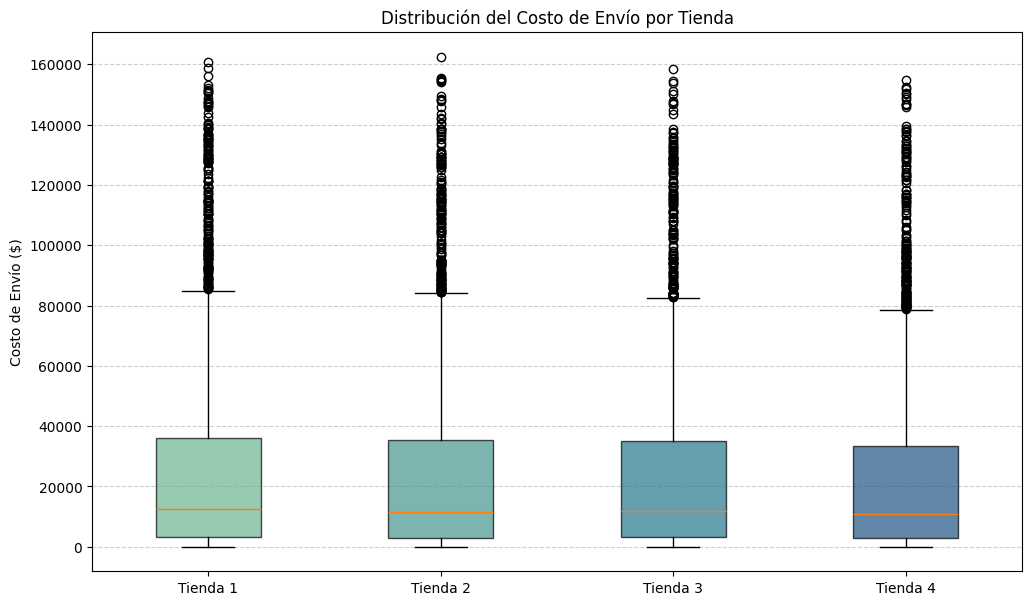

In [12]:

# --- 5. Valor del Envío Promedio y Distribución por Tienda ---

COLUMNA_ENVIO = 'Costo de envío'

print("\n--- 5. Calculando Costo Promedio de Envío por Tienda ---")
envio_promedio = {}
datos_envio_boxplot = [] # Lista para guardar datos para el boxplot
nombres_tienda_boxplot = [] # Lista para guardar nombres para etiquetas

for nombre, df in tiendas_dfs.items():
    try:
        if COLUMNA_ENVIO in df.columns and pd.api.types.is_numeric_dtype(df[COLUMNA_ENVIO]):
            promedio_envio = df[COLUMNA_ENVIO].mean()
            envio_promedio[nombre] = promedio_envio
            print(f"{nombre}: Costo promedio de envío -> ${promedio_envio:.2f}")
            # Guardar datos para boxplot (eliminando NaNs si los hubiera)
            datos_envio_boxplot.append(df[COLUMNA_ENVIO].dropna())
            nombres_tienda_boxplot.append(nombre)
        elif COLUMNA_ENVIO not in df.columns:
             print(f"ERROR: No se encontró la columna '{COLUMNA_ENVIO}' en {nombre}. Verifica el nombre.")
             envio_promedio[nombre] = None
        else: # La columna existe pero no es numérica
            print(f"WARN: La columna '{COLUMNA_ENVIO}' en {nombre} no es numérica. No se puede calcular el promedio.")
            envio_promedio[nombre] = None

    except Exception as e:
        print(f"Error inesperado calculando envío para {nombre}: {e}")
        envio_promedio[nombre] = None

resultados['avg_envio'] = envio_promedio # Guardar promedios

# Visualización 5: BOX PLOT - Distribución de Costos de Envío
print("\n--- Distribución de Costos de Envío por Tienda (Box Plot) ---")

if datos_envio_boxplot: # Solo graficar si tenemos datos válidos
    plt.figure(figsize=(12, 7)) # Tamaño adecuado para boxplots

    # Crear el boxplot usando matplotlib
    box_plot = plt.boxplot(datos_envio_boxplot, patch_artist=True, showfliers=True) # showfliers=True muestra outliers

    plt.ylabel('Costo de Envío ($)')
    plt.title('Distribución del Costo de Envío por Tienda')

    # Poner los nombres de las tiendas en el eje X
    # Asegurarse que el número de ticks coincide con el número de nombres
    if len(nombres_tienda_boxplot) == len(datos_envio_boxplot):
         plt.xticks(ticks=range(1, len(nombres_tienda_boxplot) + 1), labels=nombres_tienda_boxplot)
    else:
         print("Advertencia: El número de nombres de tienda no coincide con el número de conjuntos de datos de envío.")
         # Usar etiquetas genéricas si hay discrepancia
         plt.xticks(ticks=range(1, len(datos_envio_boxplot) + 1), labels=[f'Tienda {i+1}' for i in range(len(datos_envio_boxplot))])


    # Colorear las cajas
    colors = sns.color_palette("crest", len(datos_envio_boxplot))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()

else:
    print("\nNo hay datos válidos de envío para generar el Box Plot.")

Informe de Ventas

# Informe de Análisis de Desempeño - Alura Stores


## Introducción
En el presente informe hemos realizado un análisis comparativo del desempeño de las cuatro tiendas Alura Store con el objetivo de identificar cuál presenta el menor rendimiento general. Esta evaluación servirá como base para tomar la decisión estratégica del señor Juan sobre qué tienda vender para reinvertir en un nuevo negocio.

Este análisis se ha centrado en cinco aspectos clave:
1.  Facturación total por tienda.
2.  Categorías de productos más populares en cada tienda.
3.  Calificación promedio otorgada por los clientes a cada tienda.
4.  Productos con mayor y menor número de unidades vendidas en cada tienda.
5.  Costo promedio de envío desde cada tienda.

A continuación, se presenta los resultados detallados de cada aspecto, acompañados de una síntesis comparativa y una recomendación final.

## Análisis Detallado

Se analizaron los datos de ventas y operaciones de las cuatro tiendas. A continuación, se resumen los hallazgos principales para cada métrica evaluada.

### 1. Facturación Total por Tienda

Este indicador mide el ingreso bruto generado por cada tienda, siendo un reflejo directo de su volumen de negocio.

*   **Tienda 1:** $1,150,880,400.00

*   **Tienda 2:** $1,116,343,500.00

*   **Tienda 3:** $1,098,019,600.00

*   **Tienda 4:** $1,038,375,700.00

**Observación:** La Tienda 1 presenta la mayor facturación, mientras que la **Tienda 4 registra la facturación total más baja** de las cuatro, con una diferencia notable respecto a las demás.


### 2. Ventas por Categoría (Popularidad)

Analizamos qué categorías de productos generan más ventas (en número de unidades) en cada tienda.

*   **Tienda 1:** Muebles (465 ventas)

*   **Tienda 2:** Muebles (442 ventas)

*   **Tienda 3:** Muebles (499 ventas)

*   **Tienda 4:** Muebles (480 ventas)

**Observación:** La categoría "Muebles" es consistentemente la más popular en *todas* las tiendas. Aunque hay ligeras variaciones en el volumen (Tienda 3 lidera, Tienda 2 tiene el menor volumen en esta categoría principal), este indicador no revela una debilidad estructural significativa en una tienda específica respecto a las demás en cuanto a la categoría más vendida.


### 3. Calificación Promedio de Clientes por Tienda

La satisfacción del cliente es crucial. Evaluamos la calificación promedio (sobre 5) que los clientes han otorgado a cada tienda.

*   **Tienda 1:** 3.98 / 5

*   **Tienda 2:** 4.04 / 5

*   **Tienda 3:** 4.05 / 5

*   **Tienda 4:** 4.00 / 5

**Observación:** Todas las tiendas mantienen calificaciones promedio relativamente buenas (alrededor de 4.0). La **Tienda 1 tiene la calificación promedio ligeramente más baja**, mientras que la Tienda 3 tiene la más alta. La Tienda 4 se sitúa en un punto intermedio-bajo.


### 4. Productos Más y Menos Vendidos (Unidades)

Identificamos los productos específicos con mayor y menor volumen de ventas (en unidades) para entender mejor el rendimiento a nivel de artículo.

*   **Tienda 1:**
    *   Más vendido: Microondas (60 unidades)
    *   Menos vendido: Auriculares con micrófono (33 unidades)
*   **Tienda 2:**
    *   Más vendido: Iniciando en programación (65 unidades)
    *   Menos vendido: Juego de mesa (32 unidades)
*   **Tienda 3:**
    *   Más vendido: Kit de bancas (57 unidades)
    *   Menos vendido: Bloques de construcción (35 unidades)
*   **Tienda 4:**
    *   Más vendido: Cama box (62 unidades)
    *   Menos vendido: Guitarra eléctrica (33 unidades)

**Observación:** La Tienda 2 registra el producto menos vendido con el menor número de unidades (32). Las Tiendas 1 y 4 tienen productos menos vendidos con 33 unidades. La Tienda 3 muestra el mayor número de unidades para su producto menos vendido (35). Esto podría sugerir que la Tienda 2 tiene algunos productos con una rotación particularmente baja.

### 5. Costo Promedio de Envío por Tienda

El costo de envío puede influir en la decisión de compra del cliente y reflejar la eficiencia logística o la distancia promedio a los clientes.

*   **Tienda 1:** $26,018.61

*   **Tienda 2:** $25,216.24

*   **Tienda 3:** $24,805.68

*   **Tienda 4:** $23,459.46

**Observación:** La **Tienda 4 presenta el costo promedio de envío más bajo**, lo cual podría ser una ventaja competitiva o indicar una base de clientes geográficamente más cercana. Por el contrario, la Tienda 1 tiene el costo promedio de envío más alto, lo que podría ser un factor disuasorio para algunos clientes o indicar mayores costos operativos en logística.


## Síntesis y Comparativa

<table>
  <thead>
    <tr>
      <th>Métrica</th>
      <th>Tienda 1</th>
      <th>Tienda 2</th>
      <th>Tienda 3</th>
      <th>Tienda 4</th>
      <th>Comentario Clave para Decisión Venta</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Facturación Total</strong></td>
      <td>$1,150.9M (Más Alta)</td>
      <td>$1,116.3M (2da Alta)</td>
      <td>$1,098.0M (3ra Alta)</td>
      <td><strong>$1,038.4M (Más Baja)</strong></td>
      <td><strong>Tienda 4 es la que menos ingresa.</strong></td>
    </tr>
    <tr>
      <td><strong>Cat. Más Popular</strong></td>
      <td>Muebles (465)</td>
      <td>Muebles (442)</td>
      <td>Muebles (499)</td>
      <td>Muebles (480)</td>
      <td>No es un diferenciador clave.</td>
    </tr>
    <tr>
      <td><strong>Calificación Promedio</strong></td>
      <td><strong>3.98 (Más Baja)</strong></td>
      <td>4.04 (2da Alta)</td>
      <td>4.05 (Más Alta)</td>
      <td>4.00 (2da Baja)</td>
      <td>Tienda 1 ligeramente peor valorada.</td>
    </tr>
    <tr>
      <td><strong>Unid. Prod. Menos Vendido</strong></td>
      <td>33</td>
      <td><strong>32 (Más Bajo)</strong></td>
      <td>35 (Más Alto)</td>
      <td>33</td>
      <td>Tienda 2 con menor rotación en cola.</td>
    </tr>
    <tr>
      <td><strong>Costo Envío Promedio</strong></td>
      <td>$26,018 (Más Alto)</td>
      <td>$25,216 (2do Alto)</td>
      <td>$24,805 (2do Bajo)</td>
      <td><strong>$23,459 (Más Bajo)</strong></td>
      <td>Tienda 4 más económica/eficiente. Tienda 1 más costosa.</td>
    </tr>
  </tbody>
</table>

**Resumen por Tienda:**

*   **Tienda 1:** Líder en ingresos, pero con la peor calificación de clientes y el costo de envío más alto.
*   **Tienda 2:** Buen desempeño en ingresos y calificación, pero con el producto menos popular vendiendo muy pocas unidades.
*   **Tienda 3:** Fuerte desempeño general, con alta calificación y buen volumen en su categoría principal.
*   **Tienda 4:** **La más débil en facturación total**, aunque con un costo de envío bajo y una calificación aceptable.

## Conclusión y Recomendación

Considerando los cinco aspectos analizados y el objetivo de identificar la tienda con el **menor desempeño general** para su posible venta, nuestra recomendación se basa principalmente en el indicador financiero más relevante: la facturación total.

Aunque la Tienda 1 presenta la calificación más baja y el costo de envío más alto (factores negativos), sigue siendo la que genera mayores ingresos. La Tienda 2 muestra una pequeña debilidad en la rotación de su producto menos vendido, pero sus ingresos son sólidos. La Tienda 3 parece ser la de mejor rendimiento combinado.

La **Tienda 4**, si bien tiene aspectos positivos como el bajo costo de envío y una calificación decente, es la que consistentemente genera **los ingresos más bajos**, situándose significativamente por debajo de las otras tres. En un escenario donde se busca desinvertir en la unidad de negocio con menor rendimiento financiero para liberar capital, la Tienda 4 es la candidata más clara.

**Por lo tanto, recomendamos al Sr. Juan considerar la venta de la Tienda 4.**

Esta decisión se fundamenta en su menor capacidad de generación de ingresos comparada con las otras tiendas, lo cual es el factor primordial al evaluar el rendimiento con fines de desinversión estratégica.

# Análisis del desempeño geográfico


--- ANÁLISIS GEOGRÁFICO ---

--- Visualización 1: Scatter Plot Geográfico (por Tienda) ---


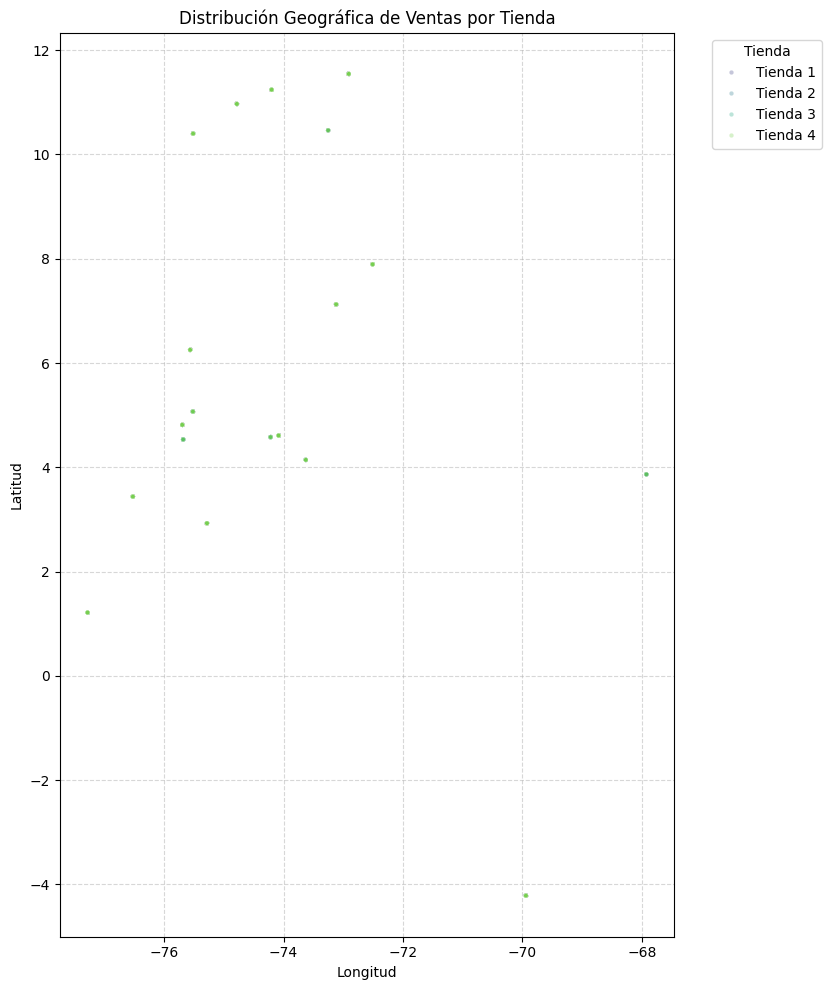

Este gráfico muestra la ubicación de cada venta. Los colores distinguen la tienda de origen.
Permite ver si las tiendas cubren áreas geográficas distintas o si se solapan.


--- Visualización 2: Mapa de Calor (Densidad de Ventas) ---


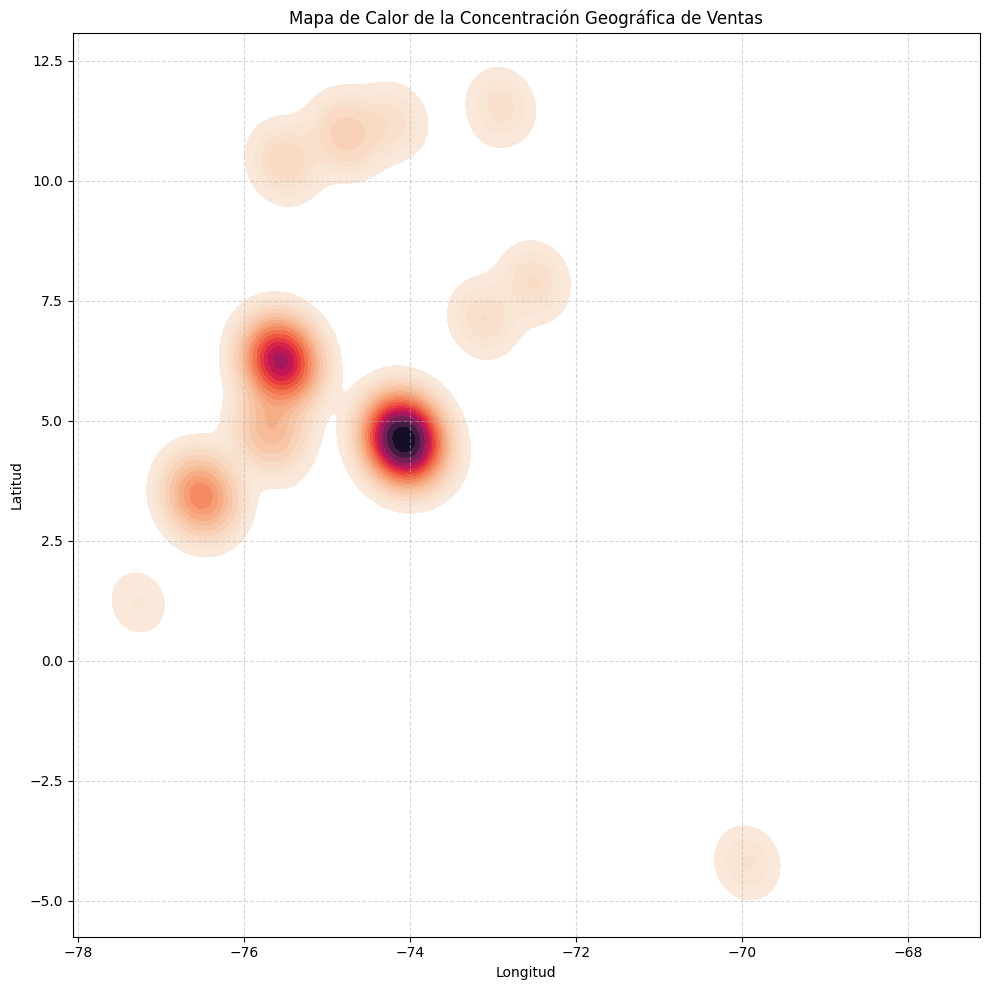

Este gráfico resalta las áreas con mayor concentración de ventas (zonas más oscuras/intensas).
Ayuda a identificar 'hotspots' geográficos de clientes.


--- Visualización 3: Scatter Plot Geográfico (por Calificación) ---


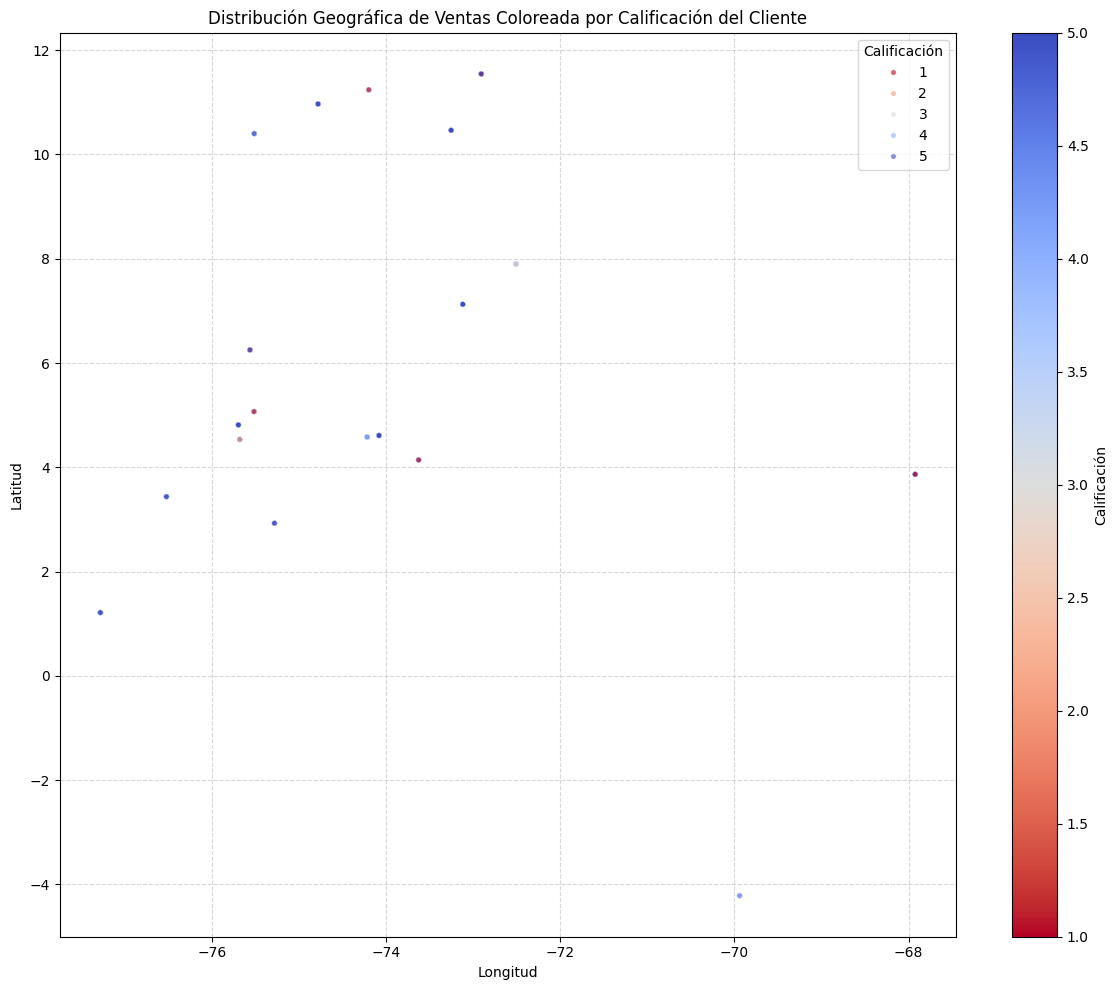

Este gráfico muestra la ubicación de cada venta, pero el color indica la calificación dada por el cliente.
(Ej: Rojo/Naranja = Baja Calificación, Azul = Alta Calificación).
Permite buscar patrones geográficos en la satisfacción del cliente. ¿Hay zonas con peores/mejores calificaciones?



In [16]:
# Extra Análisis Geográfico
print("\n--- ANÁLISIS GEOGRÁFICO ---")

# Verificar si las columnas 'lat' y 'lon' existen en todos los dataframes
required_geo_cols = ['lat', 'lon', 'Calificación'] # Incluimos Calificación para un análisis extra
available_stores_geo = {}
all_dfs_have_geo = True

for nombre, df in tiendas_dfs.items():
    if all(col in df.columns for col in required_geo_cols):
         # Seleccionar solo las columnas necesarias para evitar problemas de tipos mixtos al concatenar
         available_stores_geo[nombre] = df[required_geo_cols + ['Precio']].copy() # Añadir Precio también puede ser útil
         available_stores_geo[nombre]['Tienda'] = nombre # Añadir identificador de tienda
    else:
        print(f"Advertencia: La tienda {nombre} no contiene todas las columnas geográficas requeridas ({required_geo_cols}). Será excluida del análisis geográfico.")
        all_dfs_have_geo = False # Marcar que no todas tienen datos

# Solo proceder si tenemos datos de al menos una tienda
if available_stores_geo:

    # Combinar los datos de las tiendas disponibles en un solo DataFrame
    try:
        all_stores_geo_df = pd.concat(available_stores_geo.values(), ignore_index=True)

        # --- 1. Scatter Plot Geográfico (Coloreado por Tienda) ---
        print("\n--- Visualización 1: Scatter Plot Geográfico (por Tienda) ---")
        plt.figure(figsize=(10, 10)) # Aspecto cuadrado para mapa
        sns.scatterplot(data=all_stores_geo_df, x='lon', y='lat', hue='Tienda', palette='viridis', s=10, alpha=0.3)
        plt.title('Distribución Geográfica de Ventas por Tienda')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)
        # Ajustar layout para que la leyenda no se corte
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()
        print("Este gráfico muestra la ubicación de cada venta. Los colores distinguen la tienda de origen.")
        print("Permite ver si las tiendas cubren áreas geográficas distintas o si se solapan.\n")


        # 2. Mapa de Calor (Densidad de Ventas)
        print("\n--- Visualización 2: Mapa de Calor (Densidad de Ventas) ---")
        plt.figure(figsize=(10, 10))
        # Usamos kdeplot para estimar la densidad
        sns.kdeplot(data=all_stores_geo_df, x='lon', y='lat',
                    fill=True, # Rellenar las áreas de densidad
                    thresh=0.05, # Umbral bajo para ver más áreas (ajustar si es necesario)
                    levels=20, # Número de niveles de contorno
                    cmap="rocket_r") # Paleta de colores (oscuro = más denso)
        plt.title('Mapa de Calor de la Concentración Geográfica de Ventas')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        print("Este gráfico resalta las áreas con mayor concentración de ventas (zonas más oscuras/intensas).")
        print("Ayuda a identificar 'hotspots' geográficos de clientes.\n")

        # 3. Scatter Plot Geográfico (Coloreado por Calificación)
        print("\n--- Visualización 3: Scatter Plot Geográfico (por Calificación) ---")
        plt.figure(figsize=(12, 10)) # Un poco más ancho para la leyenda de color
        scatter_calif = sns.scatterplot(data=all_stores_geo_df, x='lon', y='lat',
                                        hue='Calificación', # Color basado en la calificación
                                        palette='coolwarm_r', # Paleta donde rojo=bajo, azul=alto
                                        s=15, alpha=0.6) # Tamaño y transparencia de puntos
        plt.title('Distribución Geográfica de Ventas Coloreada por Calificación del Cliente')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        # Mover leyenda de color
        norm = plt.Normalize(all_stores_geo_df['Calificación'].min(), all_stores_geo_df['Calificación'].max())
        sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
        sm.set_array([])
        # Añadir barra de color como leyenda
        plt.colorbar(sm, label='Calificación', ax=scatter_calif.axes)

        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        print("Este gráfico muestra la ubicación de cada venta, pero el color indica la calificación dada por el cliente.")
        print("(Ej: Rojo/Naranja = Baja Calificación, Azul = Alta Calificación).")
        print("Permite buscar patrones geográficos en la satisfacción del cliente. ¿Hay zonas con peores/mejores calificaciones?\n")

    except Exception as e:
        print(f"\nOcurrió un error durante el análisis geográfico: {e}")
        print("Asegúrate de que las columnas 'lat', 'lon' y 'Calificación' existen y son numéricas en los archivos CSV.")

else:
    print("\nNo se encontraron datos geográficos válidos ('lat', 'lon', 'Calificación') en ninguna tienda para realizar el análisis.")